# Experiments - Evolutionary Algorithm TSP

In [237]:
%load_ext autoreload
%autoreload 2
    
import numpy as np
from tsp_evolutionary_algorithm import TSPEvolutionaryAlgorithm
from Reporter import Reporter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
# The dataset filenames
datasets = ['tour29.csv', 'tour100.csv', 'tour194.csv', 'tour929.csv']
benchmarks = [(27200, 30350.13), (7350, 8636.5), (9000, 11385.01), (95300, 113683.58)]

# Sequence of Experiments

## 1. Typical Convergence Graph

In [241]:
dataset_idx = 3

file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

reporter = Reporter(datasets[dataset_idx][:-4])
ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=100, mu=20, k=4,
                              recombination_probability=0.9,
                              mutation_probability=0.1,
                              local_search_probability=0.3)

while not ga.converged(improvement_criterion=False):
    ga.update()

    # extract results of current generation
    mean_objective = ga.mean_objective
    best_objective = ga.best_objective
    best_solution = ga.best_solution
    time_left = reporter.report(mean_objective,
                                best_objective,
                                best_solution)
    print(ga.state, time_left)
    if time_left < 0:
        break

Population initialized!
#1 Best Objective: 106027.91063296591 - Mean Objective: 1682752.3279372319 - Diversity: 0.99 266.812735080719
#2 Best Objective: 106027.91063296591 - Mean Objective: 1316962.4383715852 - Diversity: 0.97 263.69956851005554
#3 Best Objective: 106027.91063296591 - Mean Objective: 894381.5028384401 - Diversity: 0.77 262.53409242630005
#4 Best Objective: 106027.91063296591 - Mean Objective: 500823.05700320733 - Diversity: 0.77 259.4183487892151
#5 Best Objective: 104402.78940495432 - Mean Objective: 230625.27513906072 - Diversity: 0.8 226.17330288887024
#6 Best Objective: 102099.66811583591 - Mean Objective: 116264.89696702875 - Diversity: 0.9 192.1291491985321
#7 Best Objective: 102099.66811583591 - Mean Objective: 111842.67825345634 - Diversity: 0.93 158.2908799648285
#8 Best Objective: 102099.66811583591 - Mean Objective: 110162.78740701773 - Diversity: 0.96 154.9863476753235
#9 Best Objective: 102099.66811583591 - Mean Objective: 107440.41957065983 - Diversity: 0

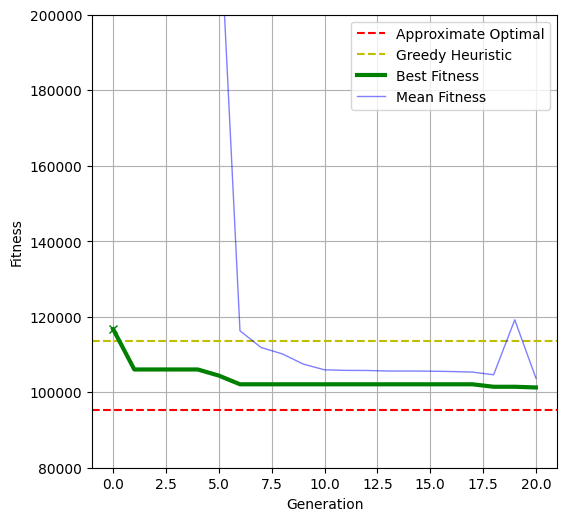

In [268]:
from matplotlib import pyplot as plt

def plot_convergence_graph(ga: TSPEvolutionaryAlgorithm, optimal, greedy):
    best_fitnesses = ga.best_history
    mean_fitnesses = ga.mean_history

    fig = plt.figure('Convergence Graph', figsize=(6,6), dpi= 100, facecolor='w', edgecolor='k')
    plt.axhline(y=optimal, color='r', linestyle='--')
    plt.axhline(y=greedy, color='y', linestyle='--')
    plt.plot(best_fitnesses, 'g', alpha=1, lw=3)
    plt.plot(mean_fitnesses, 'b', alpha=0.5, lw=1)
    plt.plot(0, best_fitnesses[0], 'gx')
    plt.plot(0, mean_fitnesses[0], 'bx')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')
    plt.legend(['Approximate Optimal', 'Greedy Heuristic', 'Best Fitness', 'Mean Fitness'])
    plt.grid(True)
    plt.ylim([80000, 0.2e6])
    plt.show()

plot_convergence_graph(ga, optimal=benchmarks[dataset_idx][0], greedy=benchmarks[dataset_idx][1])

## 2. Best Tour Length and Best Sequence of Cities

In [231]:
print(f'Best solution:\n\tfitness = {ga.best_solution.fitness}')
print(f'\troute = {ga.best_solution.route}')

Best solution:
	fitness = 7578.617608861979
	route = [28, 91, 46, 36, 94, 72, 88, 84, 6, 14, 93, 64, 79, 15, 65, 50, 0, 83, 66, 42, 67, 58, 61, 89, 43, 12, 41, 54, 86, 51, 8, 38, 13, 74, 32, 4, 39, 73, 57, 19, 5, 56, 49, 59, 18, 35, 20, 80, 55, 16, 71, 25, 68, 23, 76, 95, 34, 17, 1, 29, 69, 77, 22, 27, 70, 85, 96, 78, 33, 90, 44, 40, 48, 98, 97, 63, 24, 81, 92, 52, 60, 47, 2, 26, 75, 99, 21, 82, 31, 9, 3, 30, 87, 11, 53, 62, 7, 45, 37, 10]


## 3. Results Interpretation 

## 4. Histogram of Best and Mean Fitnesses for 1000 iterations (only for tour29)

In [183]:
dataset_idx = 0
file = open('datasets/' + datasets[dataset_idx])
distance_matrix = np.loadtxt(file, delimiter=",")
file.close()

#best_fitnesses = []
#mean_fitnesses = []

while len(best_fitnesses) < 1000:
    reporter = Reporter(datasets[dataset_idx][:-4] + f'_{iter}')
    ga = TSPEvolutionaryAlgorithm(distance_matrix, lambda_=100, mu=20, k=4,
                                  recombination_probability=0.9,
                                  mutation_probability=0.1)
    
    while not ga.converged(improvement_criterion=True):
        ga.update()

        # extract results of current generation
        mean_objective = ga.mean_objective
        best_objective = ga.best_objective
        best_solution = ga.best_solution
#         time_left = reporter.report(mean_objective,
#                                     best_objective,
#                                     best_solution)
        

    best_fitnesses.append(best_objective)
    mean_fitnesses.append(mean_objective)
    print(f'#{len(best_fitnesses)} converged!')

print(best_solution.route)

[16, 17, 18, 14, 11, 10, 9, 5, 0, 1, 4, 7, 3, 2, 6, 8, 12, 13, 15, 23, 24, 26, 19, 25, 27, 28, 22, 21, 20]


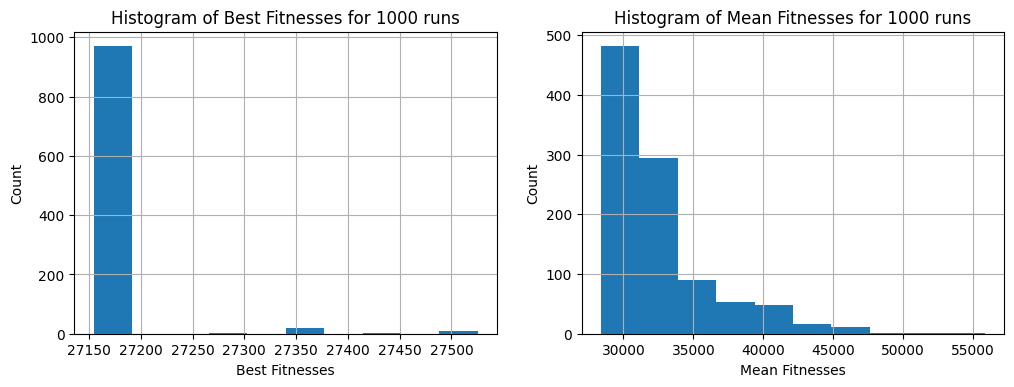

In [195]:
from matplotlib import pyplot as plt

def plot_histograms(best_fitnesses, mean_fitnesses):
    fig = plt.figure('Histograms of 1000 runs', figsize=(12,4), dpi= 100, facecolor='w', edgecolor='k')
    fig.add_subplot(1, 2, 1)
    fig.add_subplot(1, 2, 2)
    ax = fig.axes
    labels = ['Best Fitnesses', 'Mean Fitnesses']

    for idx in range(2):
        ax[idx].set_xlabel(labels[idx])
        ax[idx].set_ylabel("Count")
        ax[idx].set_title(f'Histogram of {labels[idx]} for 1000 runs')
        ax[idx].grid(True)
        ax[idx].hist([best_fitnesses, mean_fitnesses][idx], bins=10)

    plt.show()
    
""" Plot the histograms """
plot_histograms(best_fitnesses, mean_fitnesses)